# Task
Detect condiment sachets in the `sample.jpg` image by performing edge detection, finding contours, calculating their perimeters, and then summarize the number of detected sachets and their perimeters.

## Load and Resize Image

### Subtask:
Load the 'sample.jpg' image and resize it to a resolution of 480x270 pixels. Convert the resized image to grayscale for edge detection.


**Reasoning**:
First, I'll import the OpenCV library, which is essential for image processing operations like loading, resizing, and converting images to grayscale. It's a standard library for computer vision tasks.



In [13]:
import cv2
print("OpenCV imported.")

OpenCV imported.


**Reasoning**:
Now that OpenCV is imported, I will load the 'sample.jpg' image, resize it to 480x270 pixels, and then convert it to grayscale as specified in the subtask.



In [14]:
image_path = 'sample.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Resize the image
    width = 480
    height = 270
    resized_image = cv2.resize(image, (width, height))

    # Convert the resized image to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    print(f"Image '{image_path}' loaded, resized to {width}x{height}, and converted to grayscale.")


Image 'sample.jpg' loaded, resized to 480x270, and converted to grayscale.


## Apply Sobel Edge Detection

### Subtask:
Apply the Sobel operator to the grayscale image to detect edges in both the x (horizontal) and y (vertical) directions. Then, combine these results to get a comprehensive edge map.


**Reasoning**:
I will apply the Sobel operator to the `gray_image` in both the x and y directions, convert the results to 8-bit unsigned integers, and then combine them to create a comprehensive edge map as instructed.



Sobel edge detection applied and results combined.


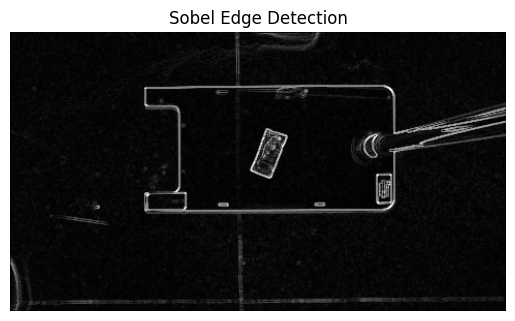

In [19]:
import numpy as np

# Apply Sobel operator in x-direction
sobelx_64f = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx_64f)

# Apply Sobel operator in y-direction
sobely_64f = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.convertScaleAbs(sobely_64f)

# Combine the x and y gradients
sobel_combined = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

print("Sobel edge detection applied and results combined.")
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()

## Find and Process Contours

### Subtask:
Threshold the combined Sobel image to obtain binary edges. Find closed contours from these binary edges. For each contour, calculate its perimeter.


**Reasoning**:
I will apply a binary threshold to the 'sobel_combined' image, then find contours in the thresholded image, and finally calculate the perimeter for each contour, storing them in a list as per the instructions.



Found 23 contours.
Calculated 23 perimeters.
Threshold Image.


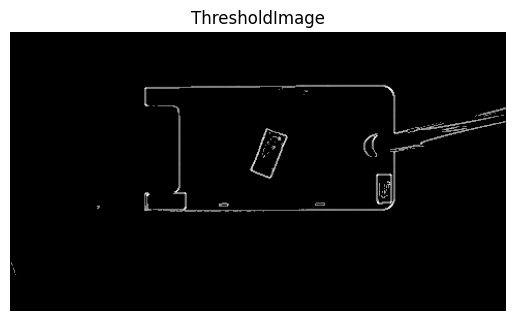

In [32]:
ret, thresh_image = cv2.threshold(sobel_combined, 120, 255, cv2.THRESH_TOZERO)

contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

perimeters = []
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    perimeters.append(perimeter)

print(f"Found {len(contours)} contours.")
print(f"Calculated {len(perimeters)} perimeters.")
print("Threshold Image.")
plt.imshow(thresh_image, cmap='gray')
plt.title('ThresholdImage')
plt.axis('off')
plt.show()


## Visualize Results

### Subtask:
Draw the detected contours on the original image (or a copy) and display the calculated perimeter for each contour using `imshow`.


**Reasoning**:
I will create a copy of the resized image, draw the detected contours on it, and then display the image with the contours, followed by waiting for a key press and closing all display windows to visualize the results as per the instructions.



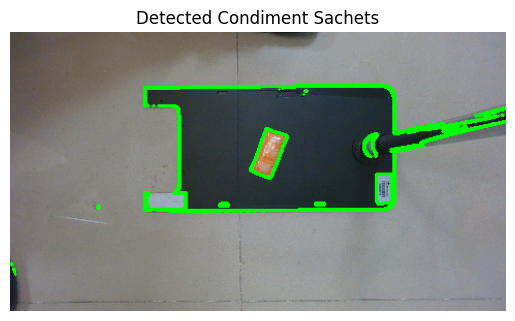

Image with detected contours displayed.


In [33]:
import matplotlib.pyplot as plt

# Create a copy of the resized_image to draw contours on
image_with_contours = resized_image.copy()

# Draw contours on the image_with_contours
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2) # -1 means draw all contours, (0, 255, 0) is green, 2 is thickness

# Display the image with contours using matplotlib
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Detected Condiment Sachets')
plt.axis('off')
plt.show()

print("Image with detected contours displayed.")

## Mask Contours Based on Perimeter

### Subtask:
Create a mask image that highlights only the contours whose perimeters fall within a specified range. This allows for selective visualization of objects based on their size or shape characteristics.

**Reasoning**:
I will initialize a black image to serve as the mask. Then, I'll define `min_perimeter` and `max_perimeter` values (which you can adjust). I'll iterate through the `perimeters` list and, for any contour whose perimeter falls within the specified range, I will draw that contour onto the blank mask. Finally, I'll display this mask to show the filtered contours.

Created mask with 1 contours filtered by perimeter range (120.00 - 200.00).


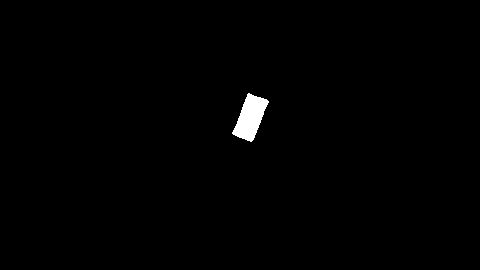

Mask of filtered contours displayed.


In [37]:
import numpy as np
from google.colab.patches import cv2_imshow

# Create a black image (mask) the same size as the resized image
mask = np.zeros(gray_image.shape, dtype=np.uint8)

# Define a perimeter range to filter contours
# You can adjust these values based on the perimeters observed previously
min_perimeter = 120.0  # Example minimum perimeter
max_perimeter = 200.0 # Example maximum perimeter
s
filtered_contours_count = 0
for i, contour_perimeter in enumerate(perimeters):
    if min_perimeter <= contour_perimeter <= max_perimeter:
        # Draw the contour on the mask if its perimeter is within the range
        cv2.drawContours(mask, [contours[i]], -1, (255), -1) # Draw in white (255), filled (-1)
        filtered_contours_count += 1

print(f"Created mask with {filtered_contours_count} contours filtered by perimeter range ({min_perimeter:.2f} - {max_perimeter:.2f}).")

# Display the mask
cv2_imshow(mask)
print("Mask of filtered contours displayed.")